In [22]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Generate a sin function

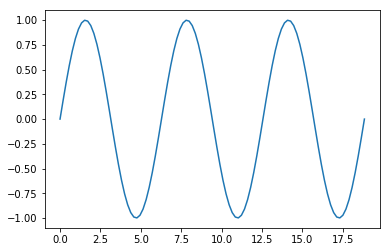

In [23]:
N = 100
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

plt.plot(X, Y)
plt.show()

In [24]:
def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))

def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
#     return np.vstack(data).T
    data = np.array(data)
    return data.T

def get_mse(Y, Yhat):
    d = Y - Yhat
    return d.dot(d)/len(Y)

def fit_and_display(X, Y, sample=20, deg=5):
    n = len(X)
    train_indices = np.random.choice(n, sample)
    Xtrain = X[train_indices]
    Ytrain = Y[train_indices]
    
    plt.scatter(Xtrain, Ytrain)
    plt.show()
    
    # fit polynomial
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)
    
    # display the polynomial
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    
    plt.plot(X, Y)
    plt.plot(X, Y_hat)
    plt.scatter(Xtrain, Ytrain)
    plt.title("deg = %d" % deg)
    plt.show()
    

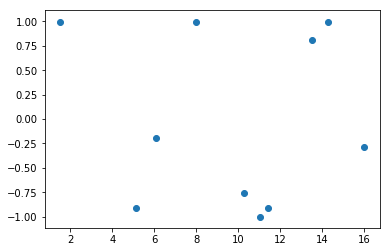

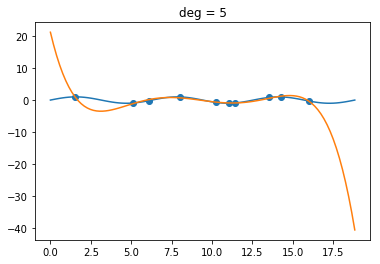

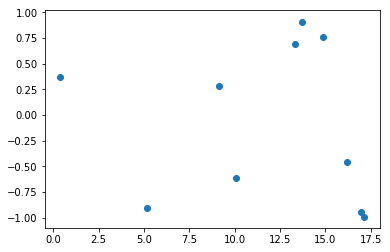

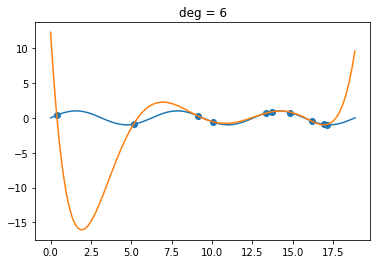

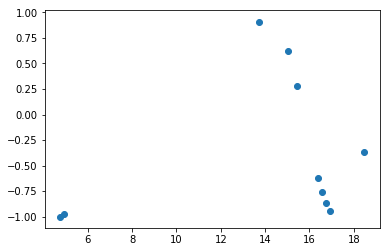

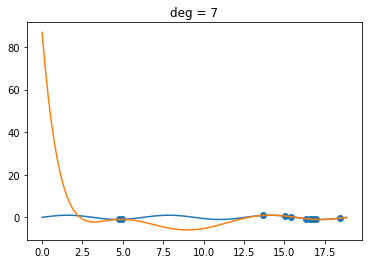

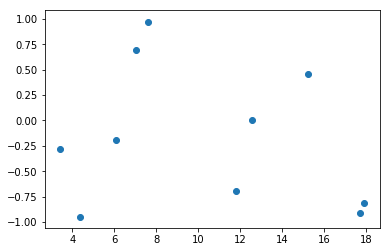

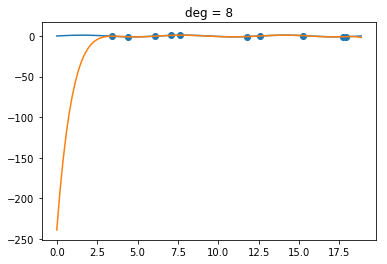

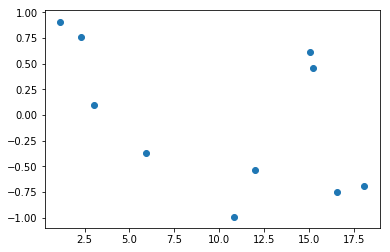

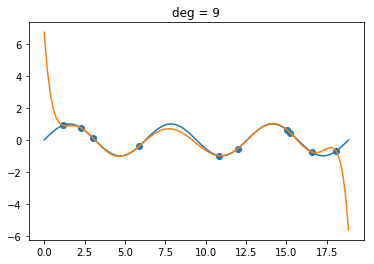

In [25]:
for deg in (5, 6, 7, 8, 9):
        fit_and_display(X, Y, 10, deg)

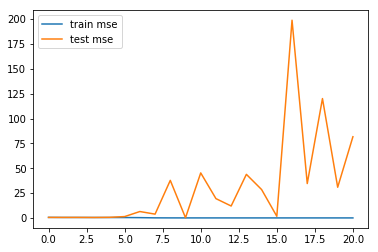

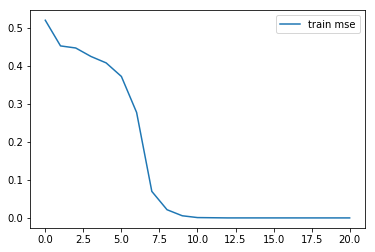

In [43]:
def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    n = len(X)
    train_indices = np.random.choice(n, sample)
    Xtrain = X[train_indices]
    Ytrain = Y[train_indices]
    
    test_indices = [idx for idx in range(n) if idx not in train_indices]
    X_test = X[test_indices]
    Y_test = Y[test_indices]
    
    mse_trains = []
    mse_tests = []
    
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)
        
        Xtest_poly = make_poly(X_test, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Y_test, Yhat_test)
        
        mse_trains.append(mse_train)
        mse_tests.append(mse_test)
        
    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

plot_train_vs_test_curves(X, Y)
    